In [2]:
import os 
import pandas as pd
import re
from datetime import datetime
import numpy as np
import seaborn as sns

import genderdecoder

In [4]:
print(os.getcwd())
path_bulletins = r".\data-science-for-good-city-of-los-angeles\CityofLA\Job Bulletins"
bulletins=os.listdir(path_bulletins)

D:\Travail\ESLSCA\Machine Learning\PROJET


In [5]:
def to_dataframe(num,df,locationdir):
    """"function to extract features from job bulletin text files and convert to
    pandas dataframe.
    function take two arguments 
                        1.the number of files to be read
                        2.dataframe object                                      
                        3.directory in which the files are located                        
    """
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d\d-\d\d-\d\d)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    
    for no in range(0,num):
        nblines = 0
        nbchars = 0
        with open(path_bulletins+"/"+bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','')
                    nblines = file.count('\n')
                    data=file.replace('\n','')
                    nbchars = len(data)
                    # print(data)
                    headings=[heading for heading in file.split('\n') if heading.isupper()]             ##getting heading from job bulletin

                    sal=re.search(salary,data)
                    odate=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1][:1200]).group(1)
                    
                    duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    try:
                        enddate=re.search(
                                r'(JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER)\s(\d{1,2},\s\d{4})'
                                ,data).group()
                    except Exception as e:
                        enddate=np.nan
                    # Retreiving deadline application in appropriate date format
                    if enddate!=np.nan:
                        edate = datetime.strptime(enddate.replace(',',''),"%B %d %Y")
                        validity_duration =abs((edate-odate).days)
                    else: 
                        edate = np.nan
                        validity_duration = np.nan
                    
                    selection= [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',data)]     ##match selection criteria
                    
                    #compute number of requirements that may dissuade potential candidates 
                    if '10. ' in req:
                        nb_requirements = 10
                    elif '9. ' in req:
                        nb_requirements = 9
                    elif '8. ' in req:
                        nb_requirements = 8
                    elif '7. ' in req:
                        nb_requirements = 7
                    elif '6. ' in req:
                        nb_requirements = 6
                    elif '5. ' in req:
                        nb_requirements = 5
                    elif '4. ' in req:
                        nb_requirements = 4
                    elif '3. ' in req:
                        nb_requirements = 3
                    elif '2. ' in req:
                        nb_requirements = 2
                    else:
                        nb_requirements = 1
                    
                    #compute number of selection steps that may dissuade potential candidates
                    nb_selection_steps = len(selection)
                    
                    #encode if there is a writing test, an essay or additional selection steps
                    if 'Test' in selection:
                        select_wtest = 1
                    else:
                        select_wtest = 0
                        
                    if 'Essay' in selection: 
                        select_essay = 1
                    else:
                        select_essay = 0    
                        
                    if 'Interview' in selection:
                        select_interv = 1
                    else:
                        select_interv = 0    
                    
                    df=df.append({'File Name':bulletins[no],'Position':headings[0].lower(),'salary_start':sal.group(1),
                               'salary_end':sal.group(5),"opendate":odate,"requirements":req,'duties':duties,
                                'deadline':enddate,'deadline_date':edate, 'validity_duration':validity_duration,'selection':selection,
                                'nb_lines':nblines, 'nb_chars':nbchars, 'nb_requirements':nb_requirements, 'nb_selection_steps':nb_selection_steps,
                                'WTest':select_wtest, 'Essay':select_essay, 'Interview':select_interv },ignore_index=True)
                    
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['FULL_TIME_PART_TIME']=df['EXPERIENCE_LENGTH'].apply(lambda x:  'FULL_TIME' if x is not np.nan else np.nan )
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['SCHOOL_TYPE']=df['EDUCATION_YEARS'].apply(lambda x : 'College or University' if x is not np.nan else np.nan)
                    
                    # Add gender biased study with gender-geocoder
                    #job_description = file
                    #genderbias = genderdecoder.assess(job_description)
                    #print(genderbias)
                    
                except Exception as e:
                    print(e)
                    print('umatched sequence')
                    
                    
                
                
        
           
    return df

In [6]:
df=pd.DataFrame(columns=['File Name','Position','salary_start','salary_end','opendate','requirements','duties','deadline', 'deadline_date','validity_duration', 'selection', 'nb_lines','nb_chars'])
df=to_dataframe(len(bulletins),df, path_bulletins)
# df.to_csv('/content/drive/My Drive/Colab Notebooks/job class output.csv')

'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'float' object has no attribute 'replace'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'float' object has no attribute 're

In [8]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,nb_chars,Essay,Interview,WTest,nb_requirements,nb_selection_steps,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,9781,0.0,1.0,0.0,3.0,1.0,One,FULL_TIME,NaN,NaN
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,10260,0.0,1.0,1.0,1.0,2.0,NaN,NaN,four,College or University
2,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,7821,0.0,1.0,1.0,1.0,2.0,Two,FULL_TIME,NaN,NaN
3,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,11451,1.0,1.0,1.0,3.0,3.0,One,FULL_TIME,four,College or University
4,ADMINISTRATIVE CLERK 1358 033018 (2).txt,administrative clerk,"37,584","$54,935",2018-03-30,ix months of full-time paid experience in cler...,An Administrative Clerk performs general offic...,"APRIL 12, 2018",2018-04-12,13,...,7243,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df['GENDER_WORDS'] = df['duties'].apply(lambda x : genderdecoder.assess(x)['result'])

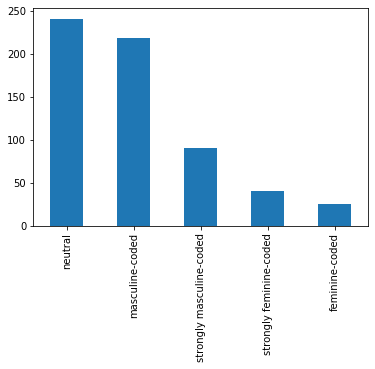

In [10]:
df["GENDER_WORDS"].value_counts().plot(kind='bar')

In [11]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,Essay,Interview,WTest,nb_requirements,nb_selection_steps,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,GENDER_WORDS
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,0.0,1.0,0.0,3.0,1.0,One,FULL_TIME,NaN,NaN,neutral
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,0.0,1.0,1.0,1.0,2.0,NaN,NaN,four,College or University,strongly masculine-coded
2,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,0.0,1.0,1.0,1.0,2.0,Two,FULL_TIME,NaN,NaN,neutral
3,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,1.0,1.0,1.0,3.0,3.0,One,FULL_TIME,four,College or University,strongly masculine-coded
4,ADMINISTRATIVE CLERK 1358 033018 (2).txt,administrative clerk,"37,584","$54,935",2018-03-30,ix months of full-time paid experience in cler...,An Administrative Clerk performs general offic...,"APRIL 12, 2018",2018-04-12,13,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,neutral


In [12]:
count_days = pd.DataFrame(df["opendate"].value_counts())
count_days.reset_index(inplace=True)
count_days["index"].describe()
count_days['date'] = pd.to_datetime(count_days['index'])

#print(count_days)

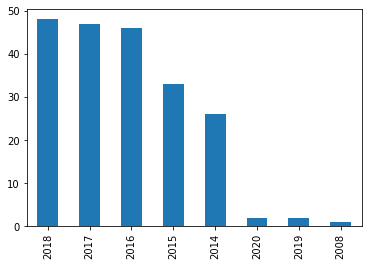

In [13]:
# Distribution by year
count_days['year'] = count_days.date.dt.year
count_days['month'] = count_days.date.dt.month
count_days['weekday'] = count_days.date.dt.weekday_name
count_days['yearmonth'] = count_days.date.map(lambda x: 100*x.year + x.month)

count_days["year"].value_counts().plot(kind='bar')

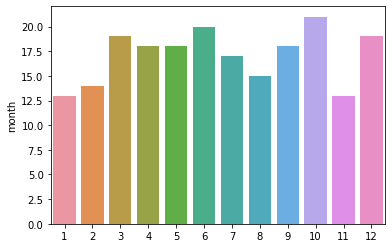

In [14]:
# Distribution by months
df_offers_by_month = pd.DataFrame(count_days['month'].value_counts())
# print(df_offers_by_month)

ax = sns.barplot(x=df_offers_by_month.index, y=df_offers_by_month.month, data=df_offers_by_month)

In [15]:
count_days["weekday"].describe()
# PROBLEME ?

count        205
unique         1
top       Friday
freq         205
Name: weekday, dtype: object

In [16]:
df['nb_requirements'].describe()

count    616.000000
mean       1.876623
std        1.002942
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        8.000000
Name: nb_requirements, dtype: float64

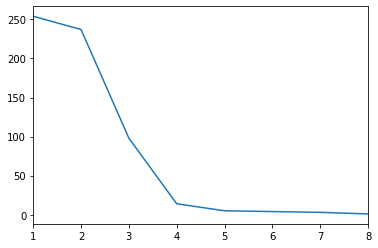

In [17]:
df['nb_requirements'].value_counts().plot()

In [18]:
df['nb_selection_steps'].describe()

count    616.000000
mean       1.292208
std        0.768699
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: nb_selection_steps, dtype: float64

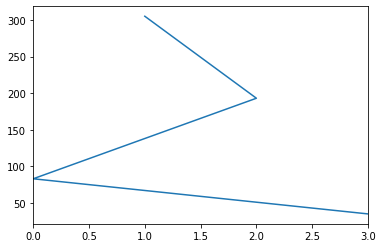

In [19]:
df['nb_selection_steps'].value_counts().plot()

In [20]:
df['nb_lines'].describe()

count     616
unique     59
top        83
freq       30
Name: nb_lines, dtype: int64

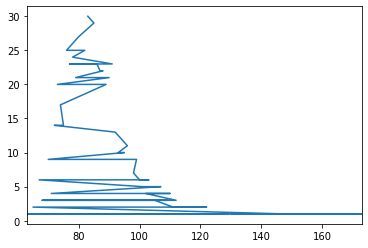

In [21]:
df['nb_lines'].value_counts().plot()

In [22]:
df['validity_duration'].describe()

count     616
unique     34
top        13
freq      490
Name: validity_duration, dtype: int64

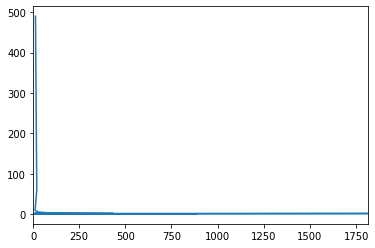

In [23]:
df['validity_duration'].value_counts().plot()